## Avoid Overfitting By Early Stopping With XGBoost In Python


Overfitting is a problem with sophisticated non-linear learning algorithms like gradient boosting.

In this post you will discover how you can use early stopping to limit overfitting with XGBoost in Python.

After reading this post, you will know:

    About early stopping as an approach to reducing overfitting of training data.
    How to monitor the performance of an XGBoost model during training and plot the learning curve.
    How to use early stopping to prematurely stop the training of an XGBoost model at an optimal epoch.

### Early Stopping to Avoid Overfitting

Early stopping is an approach to training complex machine learning models to avoid overfitting.

It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit.

The performance measure may be the loss function that is being optimized to train the model (such as logarithmic loss), or an external metric of interest to the problem in general (such as classification accuracy).


# Monitoring Training Performance With XGBoost


The XGBoost model can evaluate and report on the performance on a test set for the the model during training.

It supports this capability by specifying both an test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output.

XGBoost supports a suite of evaluation metrics not limited to:

    “rmse” for root mean squared error.
    “mae” for mean absolute error.
    “logloss” for binary logarithmic loss and “mlogloss” for multi-class log loss (cross entropy).
    “error” for classification error.
    “auc” for area under ROC curve.


In [1]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# load data
dataset = loadtxt('/mnt/data1/my_codes/my_notebooks/boosting/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.28346
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.


Reviewing all of the output, we can see that the model performance on the test set sits flat and even gets worse towards the end of training.

# Evaluate XGBoost Models With Learning Curves

We can retrieve the performance of the model on the evaluation dataset and plot it to get insight into how learning unfolded while training.

We provide an array of X and y pairs to the eval_metric argument when fitting our XGBoost model. In addition to a test set, we can also provide the training dataset. This will provide a report on how well the model is performing on both training and test sets during training.

In addition, the performance of the model on each evaluation set is stored and made available by the model after training by calling the model.evals_result() function. This returns a dictionary of evaluation datasets and performance measures for each training epoch.

Additionally, we can specify more evaluation metrics to evaluate and collect by providing an array of metrics to the eval_metric argument of the fit() function.

We can then use these collected performance measures to create a line plot and gain further insight into how the model behaved on train and test datasets over training epochs.

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28346	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50934
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

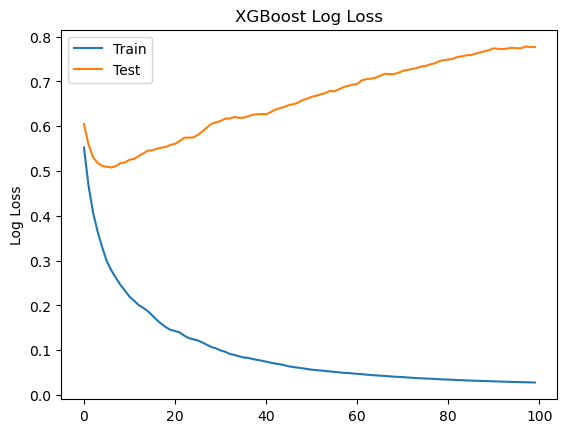

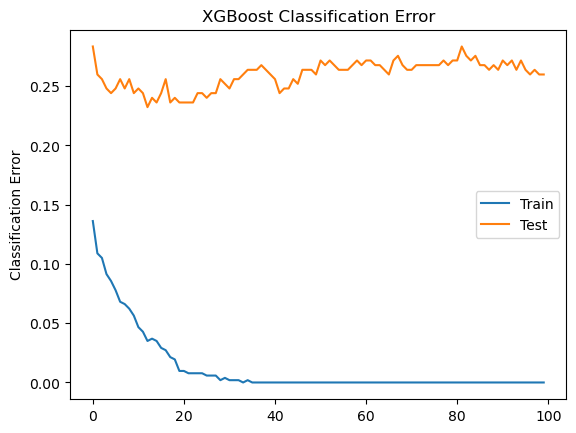

In [2]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# load data
dataset = loadtxt('/mnt/data1/my_codes/my_notebooks/boosting/data/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Each of ‘validation_0‘ and ‘validation_1‘ correspond to the order that datasets were provided to the eval_set argument in the call to fit().

From reviewing the logloss plot, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20 to epoch 40.

We see a similar story for classification error, where error appears to go back up at around epoch 40.

## Early Stopping With XGBoost

XGBoost supports early stopping after a fixed number of iterations.

In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. 
This is specified in the early_stopping_rounds parameter.

If multiple evaluation datasets or multiple evaluation metrics are provided, then early stopping will use the last in the list.

[0]	validation_0-logloss:0.60491	validation_0-error:0.28346
[1]	validation_0-logloss:0.55934	validation_0-error:0.25984
[2]	validation_0-logloss:0.53068	validation_0-error:0.25591
[3]	validation_0-logloss:0.51795	validation_0-error:0.24803
[4]	validation_0-logloss:0.51153	validation_0-error:0.24409
[5]	validation_0-logloss:0.50934	validation_0-error:0.24803
[6]	validation_0-logloss:0.50818	validation_0-error:0.25591
[7]	validation_0-logloss:0.51097	validation_0-error:0.24803
[8]	validation_0-logloss:0.51760	validation_0-error:0.25591
[9]	validation_0-logloss:0.51912	validation_0-error:0.24409
[10]	validation_0-logloss:0.52503	validation_0-error:0.24803
[11]	validation_0-logloss:0.52697	validation_0-error:0.24409
[12]	validation_0-logloss:0.53335	validation_0-error:0.23228
[13]	validation_0-logloss:0.53905	validation_0-error:0.24016
[14]	validation_0-logloss:0.54545	validation_0-error:0.23622
[15]	validation_0-logloss:0.54613	validation_0-error:0.24409
[16]	validation_0-logloss:0.54982	

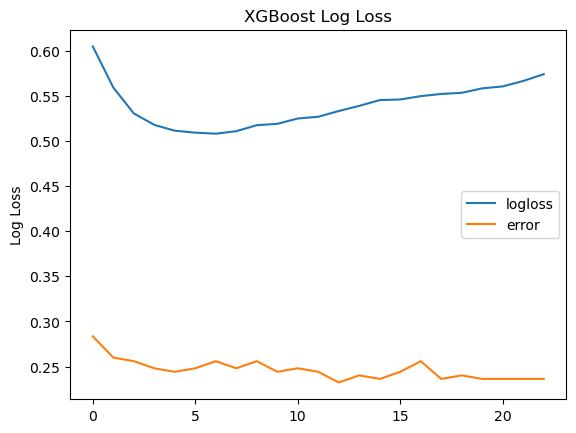

In [3]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('/mnt/data1/my_codes/my_notebooks/boosting/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["logloss", "error"], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='logloss')
ax.plot(x_axis, results['validation_0']['error'], label='error')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

The model with the best loss was observed is returned.

It is generally a good idea to select the early_stopping_rounds as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on plots of learning curves.

Summary
In this post you discovered about monitoring performance and early stopping.

You learned:

    About the early stopping technique to stop model training before the model overfits the training data.
    How to monitor the performance of XGBoost models during training and to plot learning curves.
    How to configure early stopping when training XGBoost models.